# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I</span>


### <span style="color:darkred">Exercícios com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

In [2]:
# carregando a biblioteca necessária
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1)

Considere a tabela com os dados a seguir

 username     | Primeiro Nome  | Sobrenome | Ano de nascimento | Foto
 :------ |:--------- |:----- | --- | --- 
 joao@provider.com     | João | Oliveira | 1996 | foto1033.jpg
 bet89@hoster.net    | Elizabete | Costa Silva | 1989 | foto0010.jpg
 maria@internet.com.br | Maria Cláudia | Nunes de Souza | 1976 | foto2401.jpg
 
 De acordo com a definição de dados estruturados e não estruturados, esse conjunto de dados é
 
 <font color='red'>(a) Estruturado</font><br>
 (b) Não-estruturado<br>
 (c) Estruturado quando não consideramos o atributo *Foto*<br>
 (d) Estruturado quando não consideramos os atributos *username* e *Foto*<br>
 
 Justifique sua escolha.

<font color='red'>Resposta</font>: *todos os campos e registros são endereçáveis e passíveis de armazenamento e recuperação. O atributo Foto se refere ao arquivo da imagem que contém a foto, mas não à informações visuais contidas nessas imagens. Ainda que as imagens sejam não-estruturadas, o dado relativo ao nome do arquivo é estruturado. Assim, a tabela contém dados estruturados*

---

### Exercício 2)

São características de dados não-estruturados

 (a) Facilidade de versionamento, baixo controle de coleta, e inexistência de formato bem definido para armazenamento<br>
 <font color='red'>(b) Alta dimensionalidade, armazenamento em formato binário ou textual, e alta flexibilidade na coleta dos dados</font><br>
 (c) Alta redundância, e informações fáceis de recuperar a partir dos dados brutos<br>
 (d) Inexistência de esquema de armazenamento e recuperação, e alto controle de integridade dos dados<br>



---

### Exercício 3)

Considere as informações dadas a seguir:

<img src="./imagens/foto_tabela2.jpg" alt="tabela" width="760"/>

Poderíamos dizer que os dados disponíveis nesse arquivo exibido são do tipo: 

<font color='red'>(a) não estruturado<br></font>
(b) estruturado

Justifique sua resposta.

<font color='red'>Resposta</font>: *apesar de visualizarmos uma tabela com dados numéricos, trata-se de uma foto tirada de uma tabela com dados projetados. Assim, os dados originais são estruturados, mas no formato em que se encontra, as informações não são endereçáveis e com estrutura tal que possam ser recuperadas facilmente, sendo assim são dados não estruturados*

---

Para os próximos exercícios, vamos analise a base de dados dada pelo arquivo abaixo, que contém 100 linhas. Em particular vamos estudar os atributos "Religion", "Profession" e "Year of Birth", que possuem dados faltantes. Esses dados foram coletados de pessoas nascidas entre 1960 e 1998. Explore os atributos e dados utilizando estatística descritiva com `.describe()`, buscando pelo conjunto de valores únicos com `.unique()` e realizando contagem de frequência com `.value_counts()` (Atenção: o método `value_counts()` não mostra valores nulos/`nan`).  Para além dessas sugestões, você pode explorar a base de dados com outras ferramentas, gráficos e buscas para responder.

In [65]:
data_m = pd.read_csv("./dados/TACTD-01-Missing.csv")

### Exercício 4)

Explore o atributo Profession e escolha a opção que melhor descreve os dados incorretos e/ou faltantes:

(a) há 2 dados faltantes<br>
(b) há 8 dados faltantes, sendo 8 desses dados incorretos<br>
(c) há 6 dados faltantes, sendo 2 desses dados incorretos<br>
<font color='red'>(d) há 8 dados faltantes, sendo 6 desses dados incorretos</font><br>

<font color='red'>Resposta</font>: *Os 6 valores 'X' pode ter sido usado como forma de não preencher os dados, sendo um valor diferente de nulo/nan e portanto incorreto. Portanto, junto com os 2 NaNs, temos 8 dados faltantes.*

In [66]:
# insira seu código exibindo a estatística descritiva e valores únicos para o atributo Profession

# listando valores com groupby
print(data_m.groupby(['Profession'], dropna=False, as_index=False).size())

  Profession  size
0      Nurse    92
1          X     6
2        NaN     2


### Exercício 5)

Sobre o atributo Religion, busque por dados incorretos, corrigindo os que forem possível corrigir, e tornando nulos (`null`/`nan`) os que não forem passíveis de correção. Ao final temos, para essa variável em particular:

(a) 1 dado incorreto corrigido, e 4 dados faltantes<br>
<font color='red'>(b) 1 dado incorreto corrigido, e 5 dados faltantes</font><br>
(c) nenhum dado incorreto corrigido, e 6 dados faltantes<br>
(d) nenhum dado incorreto corrigido, e 5 dados faltantes<br>

*apesar de não constar como NaN, valores como `x`e `---` são também considerados faltantes após o tratamento de dados incorretos.*


In [67]:
# insira seu código explorando o atributo Religion
print(data_m.groupby(['Religion'], dropna=False, as_index=False).size())

    Religion  size
0        ---     1
1  Christian    94
2  Cjristian     1
3          x     1
4        NaN     3


In [68]:
# corrigindo
data_m.loc[data_m['Religion']=='Cjristian', 'Religion'] = 'Christian'
data_m.loc[data_m['Religion']!='Christian', 'Religion'] = np.nan

# listando os valores únicos e sua quantidade apos correcao
print("Após correção")
# insira seu código explorando o atributo Religion
print(data_m.groupby(['Religion'], dropna=False, as_index=False).size())

Após correção
    Religion  size
0  Christian    95
1        NaN     5


### Exercício 6)

Você recebeu informação do especialista que participou da coleta, que os dados contém profissionais nascidos entre 1960 e 2000. Sobre o atributo Year of Birth, realize uma análise exploratória, buscando por dados incorretos e faltantes. Corrija os que for possível corrigir. Após o tratamento, responda qual(is) tipo(s) de dados faltantes são mais plausíveis com base nos dados.

(a) não há dados faltantes após a correção<br>
(b) faltantes completamente aleatórios (MCAR) <br>
(c) faltantes (condicionalmente) aleatórios (MAR)<br>
<font color='red'>(d) não aleatório (MNAR)<br></font>

Dica: como o atributo é numérico, pode ser útil utilizar histograma (`df['var'].hist()`) para visualizar a distribuição dos anos de nascimento.

<font color='red'>Resposta</font>: *A distribuição do ano de nascimento mostra que há uma lacuna apenas nos anos 1965-1969. Assim, há uma grande chance de que a perda de dados de nascimento esteja relacionado ao próprio valor da variável, de forma que o tipo mais plausível é o MNAR.*


In [69]:
# insira seu código explorando o atributo Year of Birth
print('Total de faltantes: ', np.sum(data_m['Year of Birth'].isna()))

print(data_m.groupby(['Year of Birth'], dropna=False, as_index=False).size())

Total de faltantes:  14
    Year of Birth  size
0          1960.0     2
1          1961.0     2
2          1962.0     4
3          1963.0     2
4          1964.0     3
5          1970.0     3
6          1971.0     1
7          1972.0     2
8          1973.0     3
9          1974.0     4
10         1975.0     1
11         1976.0     5
12         1977.0     4
13         1978.0     3
14         1979.0     2
15         1980.0     2
16         1981.0     2
17         1982.0     2
18         1983.0     4
19         1984.0     4
20         1985.0     3
21         1986.0     3
22         1987.0     4
23         1988.0     1
24         1989.0     1
25         1990.0     2
26         1991.0     3
27         1992.0     2
28         1993.0     2
29         1994.0     1
30         1995.0     2
31         1996.0     2
32         1997.0     1
33         1998.0     2
34         1999.0     2
35            NaN    14


<AxesSubplot:>

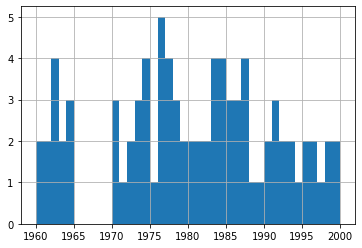

In [70]:
# investigando como os anos estão distribuídos usando histograma
min_year = data_m['Year of Birth'].describe()['min']
max_year = data_m['Year of Birth'].describe()['max']

data_m['Year of Birth'].hist(bins=range(int(min_year), int(max_year)+2))

---
Para os próximos exercícios vamos usar outra base de dados conforme carregada abaixo. Para os próximos exercícios, o uso de `boxplot()` e `hist()` pode ser útil, 

In [127]:
data2 = pd.read_csv("./dados/TACTD-01-Redundant-Outlier.csv") 

### Exercício 7)

Sabendo que o salário médio da base dos profissionais da área de saúde (Enfermeiros) é 50 mil, explore essa variável. De acordo com a análise do intervalo interquartil utilizada visualmente pelo gráfico de caixa, quantos valores podem ser considerados outliers?

(a) 6<br>
(b) 4<br>
<font color='red'>(c) 3<br></font>
(d) 2<br>


In [128]:
data2.columns

Index(['Name', 'Sex', 'Year of Birth', 'Country of Birth', 'City',
       'Profession', 'Age', 'Salary'],
      dtype='object')

In [129]:
data2.describe()

,Year of Birth,Age,Salary
count,101.000000,101.000000,101.000000
mean,1976.534653,45.465347,51764.080198
std,9.309742,9.309742,5068.726214
min,1957.000000,13.000000,32000.500000
25%,1969.000000,38.000000,48111.300000
50%,1978.000000,44.000000,50940.000000
75%,1984.000000,53.000000,54925.600000
max,2009.000000,65.000000,69500.000000


<AxesSubplot:>

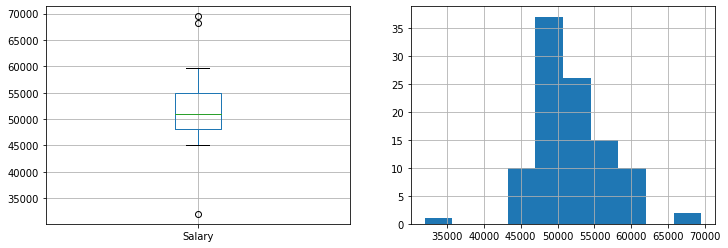

In [130]:
plt.figure(figsize=(12,4))
plt.subplot(121); data2.boxplot('Salary')
plt.subplot(122); data2['Salary'].hist()

In [131]:
print('Número de outliers: ', np.sum((data2['Salary']>61000) | (data2['Salary']<40000)))

Número de outliers:  3


### Exercício 8)

Analise os outliers obtidos na questão anterior, em particular os outliers que estão ACIMA (com valores maiores) do que a maior parte dos salários. Analise esses dados com relação aos atributos: Sex e City. Com base nessa análise, podemos dizer que esses outliers são

<font color='red'>(a) Globais ou pontuais<br></font>
(b) Contextuais com base no atributo Sex<br>
(c) Contextuais com base no atributo City<br>
(d) Coletivos com base no atributo Sex<br>

Dica: agrupe (`groupby`) estatísticas de salário com base nos atributos Sex e City.

*Resposta: com base na análise abaixo, vemos que a média de salários entre os sexos não difere de forma significativa, nem com relação à cidade. Assim, com base nos dados não há motivos para dizer que os outliers não sejam globais/pontuais.*

In [132]:
data2[data2['Salary']>61000]

,Name,Sex,Year of Birth,Country of Birth,City,Profession,Age,Salary
19,Desiree Dardar,F,1985,USA,New York,Nurse,37,69500.0
22,Douglas Damario,M,1965,USA,New Orleans,Nurse,57,68200.0


In [133]:
print(data2.groupby(['Sex'], dropna=False, as_index=False).mean()[['Sex','Salary']])

  Sex        Salary
0   F  51614.990566
1   M  51928.700000


In [134]:
print(data2.groupby(['City'], dropna=False, as_index=False).mean()[['City','Salary']])

           City        Salary
0      Acapulco  52420.327273
1      Arequipa  54320.600000
2        Austin  49409.816667
3     Edinburgh  49687.500000
4          Lima  51372.000000
5        Lisbon  49273.975000
6   New Orleans  52144.938095
7      New York  58617.766667
8     São Paulo  53478.520000
9       Toronto  49170.571429
10    Vancouver  49902.687500
11         Wick  53038.750000


---
## Exercício 9) 

Analise os atributos categóricos 'Sex' e 'Country of Birth' da base de dados. Assuma que queremos fazer uma análise cuja variável alvo será um desses atributos. Nesse caso podemos dizer que:

<font color='red'>(a) Country of Birth é desbalanceado<br></font>
(b) Sex é desbalanceado<br>
(c) Country of Birth e Sex são desbalanceados<br>
(d) Nenhum dos atributos é desbalanceado<br>

In [135]:
data2['Sex'].value_counts()

F    53
M    48
Name: Sex, dtype: int64

In [136]:
data2['Country of Birth'].value_counts()

USA         30
Brazil      20
Scotland    16
Canada      15
Mexico       9
Peru         5
Portugal     4
Mexico       2
Name: Country of Birth, dtype: int64

---
## Exercício 10) 

Verifique se há redundância em termos de: (i) linhas duplicadas, e (ii) atributos constantes e redundantes. Qual o resultado dessa análise?

<font color='red'>(a) 4 linhas duplicadas; atributo constante: Profession; atributo redundante: Age<br></font>
(b) 4 linhas duplicadas; atributo constante: Age; atributo redundante: Sex<br>
(c) 3 linhas duplicadas; atributo constante: Profession; atributo redundante: City<br>
(d) 3 linhas duplicadas; atributo constante: Name; atributo redundante: Year of Birth<br>

In [137]:
data2[data2.duplicated()]

,Name,Sex,Year of Birth,Country of Birth,City,Profession,Age,Salary
7,Apolonia Abler,F,1967,Canada,Vancouver,Nurse,55,47469.2
8,Apolonia Abler,F,1967,Canada,Vancouver,Nurse,55,47469.2
16,Carlos Cobre,M,1983,Brazil,São Paulo,Nurse,39,51314.7
100,Savannah Ball,F,1974,USA,New Orleans,Nurse,48,58911.8


In [138]:
for var in data2:
    print(var)
    print('Valores únicos:', data2[var].unique(), '\n')

Name
Valores únicos: ['Albert Keller' 'Alexandre Ronaldo' 'Alton Thornton' 'Amelia Caldwell'
 'Andre Logan' 'Apolonia Abler' 'Archie Hogan' 'Ariel Almada'
 'Bennie Reeves' 'Bernard Summers' 'Billie Duncan' 'Brad Ferguson'
 'Carlos Cobre' 'Casey Barnes' 'David Pittman' 'Desiree Dardar'
 'Diego Colque' 'Donnie Adkins' 'Douglas Damario' 'Drew Wade'
 'Eleanore Espitia' 'Elias Elmo' 'Elisa Cain' 'Elmer Walters'
 'Eloi Fuentes' 'Erica Hudson' 'Esther Morgan' 'Eugenio Ewell'
 'Ezequiel Anthony' 'Finley Rocha' 'Gabriel Paiva' 'Hailee Ochoa'
 'Herta Hatley' 'Hubert Chapman' 'Ivo Izidro' 'Izaiah Duarte' 'Jada Judon'
 'Jameson Mendoza' 'Jane Fernandez' 'Janet Hunter' 'Jeannette Lowe'
 'Jim Foster' 'Joelle Jaffee' 'John Bradley' 'Karina Belarmino'
 'Kathey Kleiman' 'Kathy Kerrigan' 'Kayden Todd' 'Kraig Kriner'
 'Leanne Lowy' 'Lillian Labree' 'Lindsey Lever' 'Lora Lemoine'
 'Lorraine Richards' 'Magali Mattos' 'Maia Banks' 'Maique Santos'
 'Marcel Olsen' 'Marcos Magro' 'Margaret Keith' 'Mariann Mule